<a href="https://colab.research.google.com/github/AlexanderOntiveros/IAyRN-2001598/blob/main/%22AF8_RNC%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AF8: Redes Neuronales Convolucionales
Integrantes:

Rodrigo Alexander Ontiveros Mendez 2001598 IMC

Luis Enrique Salazar Matrón 2047932 IMC

Andrés Murguía Valencia 2173973 IMC

Horario de Clase: Martes / N4-N6 ⏰ 🐻

Conjunto de datos MNIST. MAS INFORMACION:

*   https://keras.io/api/datasets/mnist

In [1]:
#1. Importar Librerias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
#2. Cargar conjunto de datos
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
#3. Preprocesamiento de los datos
#Normalizar las imágenes (escalar valores de píxeles entre 0 y 1)
#Ajustar dimensiones para CNN (agregar canal: 1 canal para escala de grises)
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1)).astype('float32') / 255

In [10]:
#Numero Etiquetas
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

| Label |

Number "0" 💯

Number "1" 🥇

Number "2" 🥈

Number "3" 🥉

Number "4" ⚾

Number "5" ✅

Number "6" 🍻

Number "7" ⚡

Number "8" 🎱

Number "9" 👾

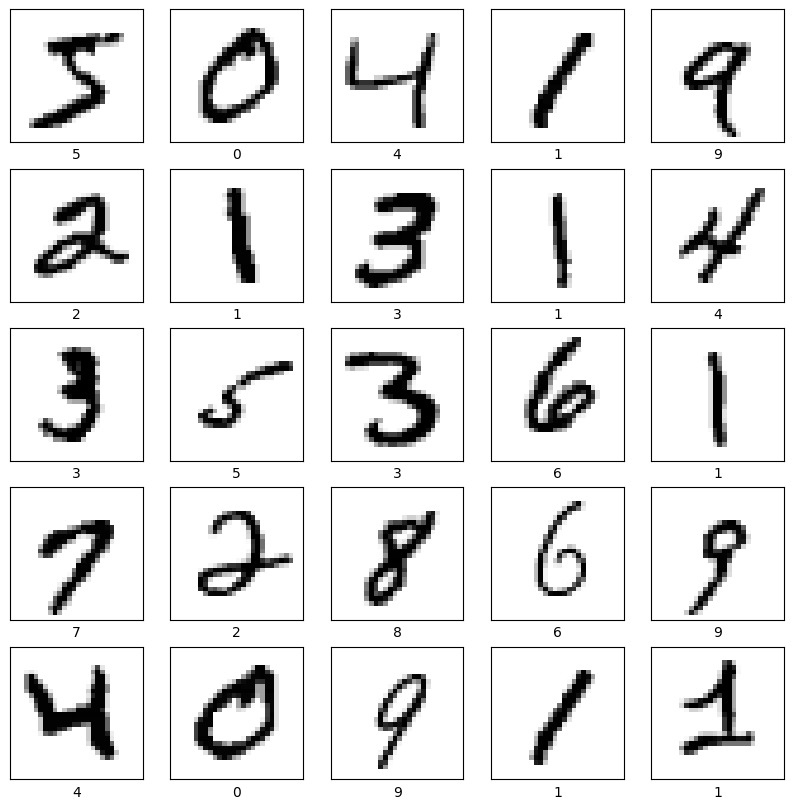

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
# Definir la estructura de la red neuronal convolucional
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
#4. Entrenamiento del modelo
history = model.fit(train_data, train_labels, epochs=6, validation_data=(test_data, test_labels))

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9794 - loss: 0.0661 - val_accuracy: 0.9822 - val_loss: 0.0561
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9822 - loss: 0.0578 - val_accuracy: 0.9819 - val_loss: 0.0579
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9816 - loss: 0.0548 - val_accuracy: 0.9836 - val_loss: 0.0511
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9850 - loss: 0.0497 - val_accuracy: 0.9830 - val_loss: 0.0507
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9845 - loss: 0.0492 - val_accuracy: 0.9827 - val_loss: 0.0533
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9873 - loss: 0.0422 - val_accuracy: 0.9836 - val_loss: 0.0499


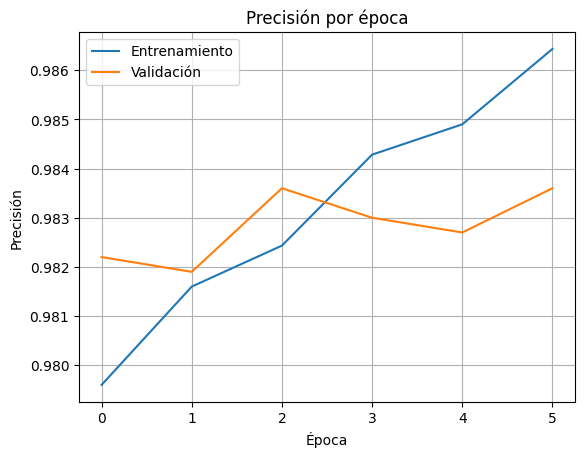

In [30]:
#Graficar precisión por época
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión por época')
plt.legend()
plt.grid()
plt.show()

In [31]:
#5. Evaluar el modelo con los datos de prueba
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Exactitud del modelo en datos de prueba:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9808 - loss: 0.0610
Exactitud del modelo en datos de prueba: 0.9836000204086304


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


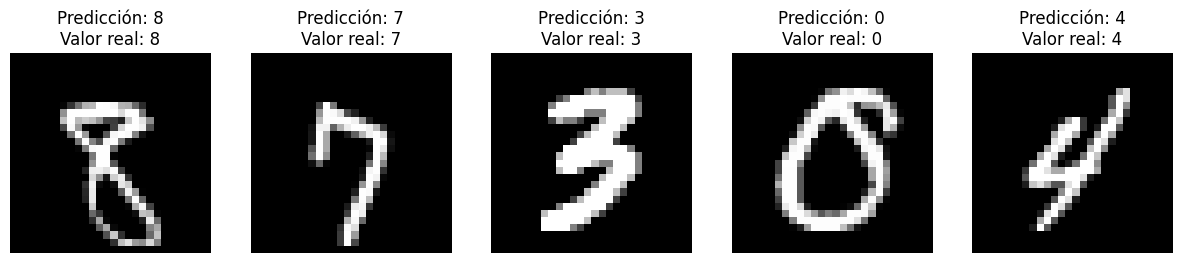

In [56]:
# Realizar predicciones y mostrar las imágenes
num_predicciones = 5
indices_aleatorios = np.random.choice(test_data.shape[0], num_predicciones, replace=False)
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices_aleatorios):
    plt.subplot(1, num_predicciones, i + 1)
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Realizar la predicción
    prediction = model.predict(np.expand_dims(test_data[idx], axis=0))
    predicted_label = np.argmax(prediction)
    actual_label = test_labels[idx]
    plt.title(f"Predicción: {predicted_label}\nValor real: {actual_label}")

plt.show()